<a href="https://colab.research.google.com/github/benvictoria17/DataAnalytics/blob/master/bank%20chrun%20prediction%20bank%20chrun%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Predicting%20Churn%20for%20Bank%20Customers/Churn_Modelling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8737,8738,15780498,Maynard,634,France,Male,34,3,145030.92,1,1,1,41820.65,0
8513,8514,15740602,Boyle,674,Germany,Female,27,4,111568.01,1,0,1,22026.18,0
4504,4505,15788930,Silva,761,Spain,Male,37,7,132730.17,1,1,0,199293.01,0
8443,8444,15567897,Chiazagomekpere,619,Germany,Male,23,5,132725.10,1,1,1,143913.33,0
7687,7688,15776494,Siciliano,754,France,Male,61,5,146622.35,1,1,1,41815.22,1
4636,4637,15630709,Castiglione,619,Germany,Female,31,2,56116.30,2,0,0,2181.94,0
1917,1918,15699772,Barclay,428,Germany,Female,40,3,129248.11,2,1,0,72876.43,1
3074,3075,15609653,Ifeatu,614,Germany,Female,44,6,118715.86,1,1,0,133591.11,1
2090,2091,15602551,Johnson,667,Spain,Male,39,9,0.00,2,1,0,68873.80,0
8239,8240,15753955,Lori,639,Spain,Male,34,7,149940.04,2,0,0,156648.81,0


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
for feature in data.columns:
  print(data[feature].value_counts(normalize=True))

1        0.0001
6671     0.0001
6664     0.0001
6665     0.0001
6666     0.0001
          ...  
3334     0.0001
3335     0.0001
3336     0.0001
3337     0.0001
10000    0.0001
Name: RowNumber, Length: 10000, dtype: float64
15634602    0.0001
15667932    0.0001
15766185    0.0001
15667632    0.0001
15599024    0.0001
             ...  
15599078    0.0001
15702300    0.0001
15660735    0.0001
15671390    0.0001
15628319    0.0001
Name: CustomerId, Length: 10000, dtype: float64
Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: Surname, Length: 2932, dtype: float64
850    0.0233
678    0.0063
655    0.0054
705    0.0053
667    0.0053
        ...  
404    0.0001
351    0.0001
365    0.0001
417    0.0001
419    0.0001
Name: CreditScore, Length: 460, dtype: float64
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geogra

In [12]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

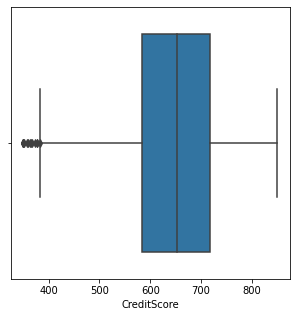

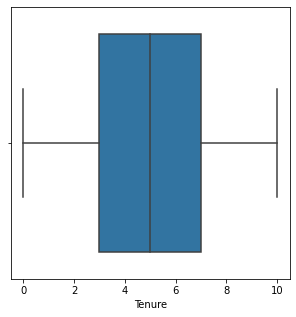

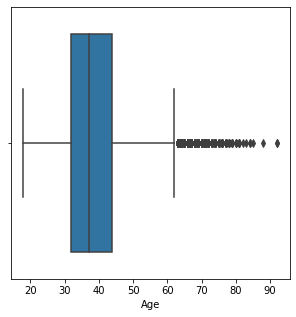

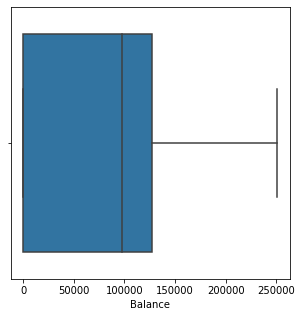

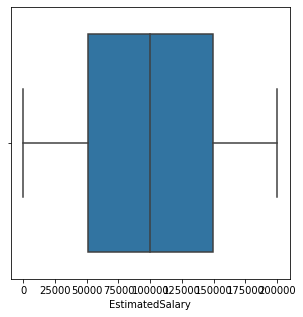

In [13]:
for feature in ['CreditScore', 'Tenure', 'Age', 'Balance', 'EstimatedSalary']:
  plt.figure(figsize=(5, 5))
  sns.boxplot(x = feature, data = data)

In [14]:
quantile25 = data.CreditScore.quantile(0.25)
quantile75 = data.CreditScore.quantile(0.75)

iqr = (quantile75 - quantile25)

lowWhisker = quantile25 - (1.5 * iqr)
upperWhisker = quantile75 + (1.5 * iqr)

lowOutliersCount = len(data[data.CreditScore < lowWhisker])
upperOutliersCount = len(data[data.CreditScore > upperWhisker])

percentageOfOutliers = ((lowOutliersCount + upperOutliersCount) / len(data)) * 100

print ( "Percentage of outliers in CreditScore feature : {0}% " .format(percentageOfOutliers))

Percentage of outliers in CreditScore feature : 0.15% 


In [15]:
data.CreditScore.clip(lower = lowWhisker, upper = upperWhisker, inplace=True)

In [16]:
data.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [17]:
data['AgeGroup'] = pd.cut(data.Age,bins=[17, 65, 93],labels=['Adult','Elderly'])

In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult


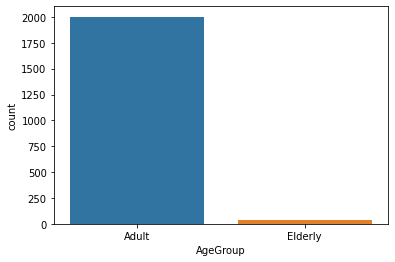

In [19]:
sns.countplot(x = 'AgeGroup', data = data[data.Exited == 1])

In [20]:
data.CreditScore.describe()

count    10000.000000
mean       650.561300
std         96.558702
min        383.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

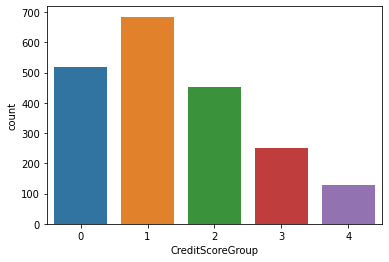

In [21]:
data['CreditScoreGroup'] = pd.cut(data.CreditScore,bins=[300, 579, 669, 739, 799, 900],labels=[0, 1, 2, 3, 4])
data['CreditScoreGroup'] = data.CreditScoreGroup.astype(int)
sns.countplot(x = 'CreditScoreGroup', data = data[data.Exited == 1])

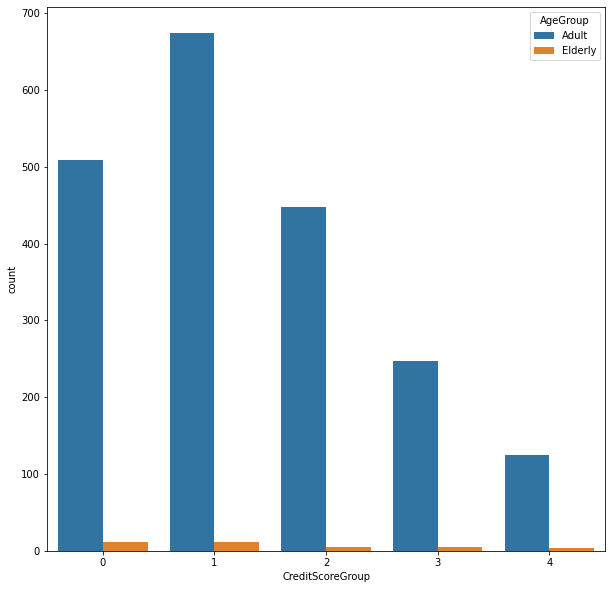

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot( x = 'CreditScoreGroup', data = data[data.Exited == 1], hue = 'AgeGroup')

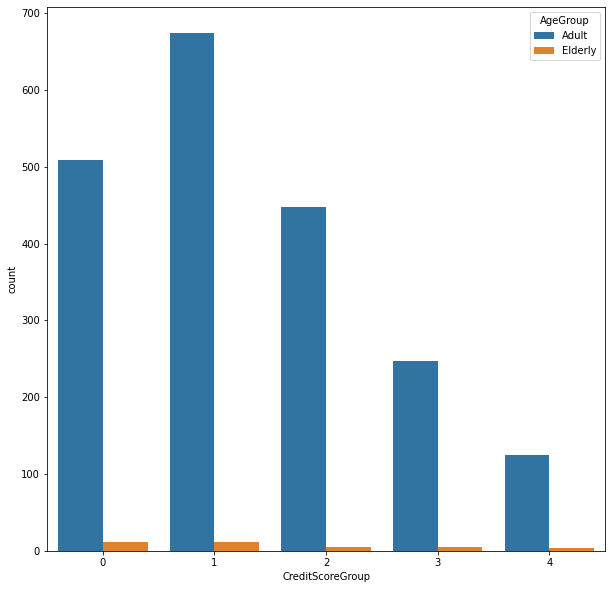

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot( x = 'CreditScoreGroup', data = data[data.Exited == 1], hue = 'AgeGroup')

50% of observation lies in feature CreditScore between 578.0 and 716.0 based on 25th and 75th percentile when Exited value is 1
50% of observation lies in feature CreditScore between 585.0 and 718.0 based on 25th and 75th percentile when Exited value is 0
50% of observation lies in feature Tenure between 2.0 and 8.0 based on 25th and 75th percentile when Exited value is 1
50% of observation lies in feature Tenure between 3.0 and 7.0 based on 25th and 75th percentile when Exited value is 0
50% of observation lies in feature Age between 38.0 and 51.0 based on 25th and 75th percentile when Exited value is 1
50% of observation lies in feature Age between 31.0 and 41.0 based on 25th and 75th percentile when Exited value is 0
50% of observation lies in feature Balance between 38340.02 and 131433.33 based on 25th and 75th percentile when Exited value is 1
50% of observation lies in feature Balance between 0.0 and 126410.28 based on 25th and 75th percentile when Exited value is 0
50% of observ

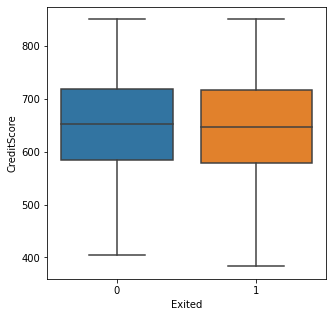

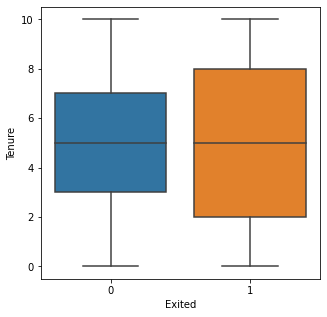

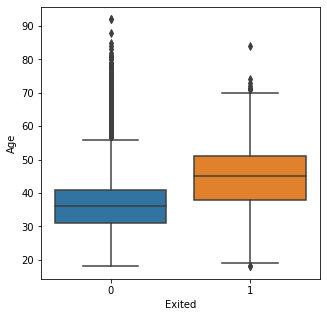

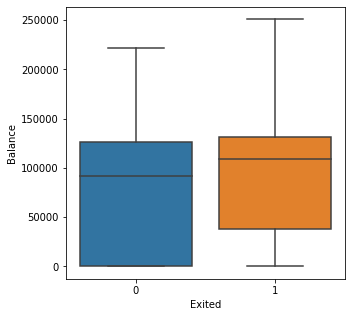

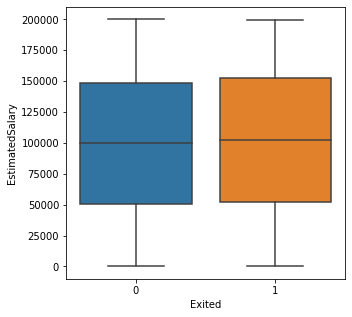

In [24]:
for feature in ['CreditScore', 'Tenure', 'Age', 'Balance', 'EstimatedSalary']:
  plt.figure(figsize=(5, 5))
  sns.boxplot(x = 'Exited', y = feature, data = data)

  quantile25 = data[data.Exited == 1][feature].quantile(0.25)
  quantile75 = data[data.Exited == 1][feature].quantile(0.75)
  print ("50% of observation lies in feature {0} between {1} and {2} based on 25th and 75th percentile when Exited value is 1" .format(feature, quantile25, quantile75)) 
  
  quantile25 = data[data.Exited == 0][feature].quantile(0.25)
  quantile75 = data[data.Exited == 0][feature].quantile(0.75)
  print ("50% of observation lies in feature {0} between {1} and {2} based on 25th and 75th percentile when Exited value is 0" .format(feature, quantile25, quantile75)) 

(Exited == 0) =======>>>>
France     0.527942
Spain      0.259199
Germany    0.212859
Name: Geography, dtype: float64
(Exited == 1) =======>>>>
Germany    0.399607
France     0.397644
Spain      0.202749
Name: Geography, dtype: float64
(Exited == 0) =======>>>>
Male      0.572523
Female    0.427477
Name: Gender, dtype: float64
(Exited == 1) =======>>>>
Female    0.559156
Male      0.440844
Name: Gender, dtype: float64
(Exited == 0) =======>>>>
2    0.532714
1    0.461509
3    0.005777
Name: NumOfProducts, dtype: float64
(Exited == 1) =======>>>>
1    0.691703
2    0.170839
3    0.108002
4    0.029455
Name: NumOfProducts, dtype: float64
(Exited == 0) =======>>>>
1    0.707146
0    0.292854
Name: HasCrCard, dtype: float64
(Exited == 1) =======>>>>
1    0.699067
0    0.300933
Name: HasCrCard, dtype: float64
(Exited == 0) =======>>>>
1    0.554565
0    0.445435
Name: IsActiveMember, dtype: float64
(Exited == 1) =======>>>>
0    0.639175
1    0.360825
Name: IsActiveMember, dtype: float64
(E

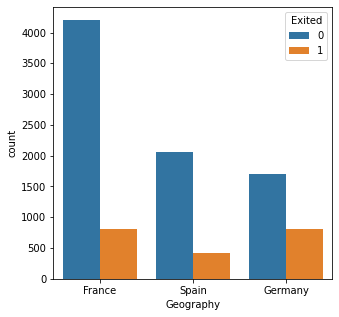

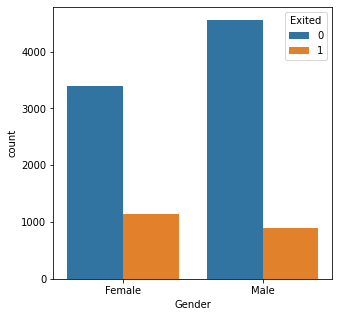

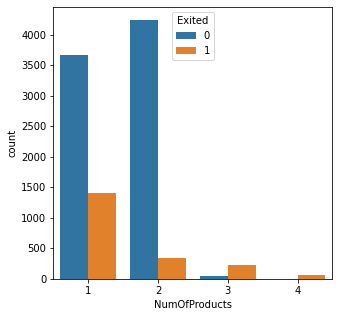

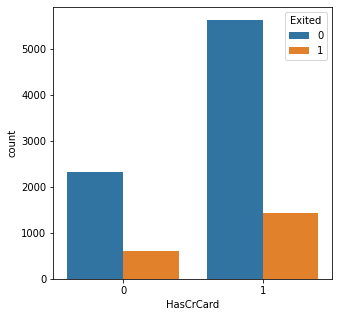

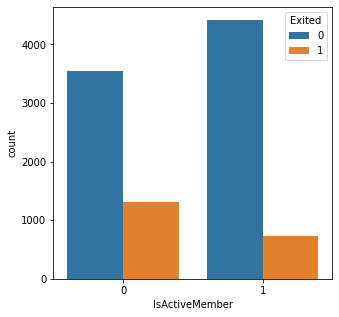

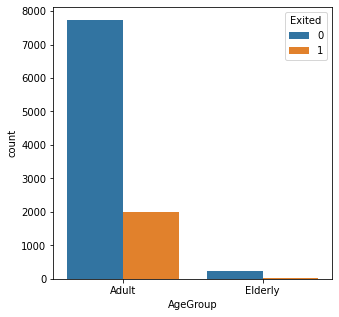

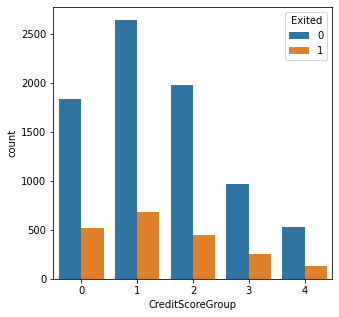

In [25]:
for feature in ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 
                'IsActiveMember', 'AgeGroup', 'CreditScoreGroup']:
  plt.figure(figsize=(5, 5))
  sns.countplot(x = feature, data = data, hue = 'Exited')

  # Percentage of observation by Geography for each Exited Category ( 0 and 1)
  print("================================================================")  
  print("(Exited == 0) =======>>>>\n{0}"  .format(data[data.Exited == 0][feature].value_counts(normalize = True)))
  print("(Exited == 1) =======>>>>\n{0}"  .format(data[data.Exited == 1][feature].value_counts(normalize = True)))